<a href="https://colab.research.google.com/github/Maoelan/Project_Tourism-Recommendation/blob/main/Project_2_Recommendation_System_Tourism_Recommendation_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# **DATA UNDERSTANDING**

In [2]:
package = pd.read_csv('/content/drive/MyDrive/dataset/archive (21)/package_tourism.csv')
tourism = pd.read_csv('/content/drive/MyDrive/dataset/archive (21)/tourism_with_id.csv')
rating = pd.read_csv('/content/drive/MyDrive/dataset/archive (21)/tourism_rating.csv')
user = pd.read_csv('/content/drive/MyDrive/dataset/archive (21)/user.csv')

In [3]:
print('Jumlah paket wisata turis : ', len(package.Package.unique()))
print('Jumlah tempat wisata turis : ', len(tourism.Place_Id.unique()))
print('Jumlah rating dari turis : ', len(rating.User_Id.unique()))
print('Jumlah user yang membuat fitur dari user : ', len(user.User_Id.unique()))

Jumlah paket wisata turis :  100
Jumlah tempat wisata turis :  437
Jumlah rating dari turis :  300
Jumlah user yang membuat fitur dari user :  300


In [4]:
tourism

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


In [5]:
rating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


# **DATA PREPROCESSING**

In [6]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [7]:
tourism = tourism.drop(['Description', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12'], axis = 1)

In [8]:
tourism

,Place_Id,Place_Name,Category
0,1,Monumen Nasional,Budaya
1,2,Kota Tua,Budaya
2,3,Dunia Fantasi,Taman Hiburan
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan
4,5,Atlantis Water Adventure,Taman Hiburan
...,...,...,...
432,433,Museum Mpu Tantular,Budaya
433,434,Taman Bungkul,Taman Hiburan
434,435,Taman Air Mancur Menari Kenjeran,Taman Hiburan
435,436,Taman Flora Bratang Surabaya,Taman Hiburan


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [10]:
rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [11]:
all_tourism_name = pd.merge(rating, tourism[['Place_Id', 'Category']], on = 'Place_Id', how = 'left')
all_tourism_name

,User_Id,Place_Id,Place_Ratings,Category
0,1,179,3,Budaya
1,1,344,2,Bahari
2,1,5,5,Taman Hiburan
3,1,373,3,Budaya
4,1,101,4,Budaya
...,...,...,...,...
9995,300,425,2,Taman Hiburan
9996,300,64,4,Budaya
9997,300,311,3,Cagar Alam
9998,300,279,4,Tempat Ibadah


In [12]:
all_tourism = pd.merge(all_tourism_name, tourism[['Place_Id', 'Place_Name']], on = 'Place_Id', how = 'left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Category,Place_Name
0,1,179,3,Budaya,Candi Ratu Boko
1,1,344,2,Bahari,Pantai Marina
2,1,5,5,Taman Hiburan,Atlantis Water Adventure
3,1,373,3,Budaya,Museum Kereta Ambarawa
4,1,101,4,Budaya,Kampung Wisata Sosro Menduran
...,...,...,...,...,...
9995,300,425,2,Taman Hiburan,Waterpark Kenjeran Surabaya
9996,300,64,4,Budaya,Museum Sasmita Loka Ahmad Yani
9997,300,311,3,Cagar Alam,The Lodge Maribaya
9998,300,279,4,Tempat Ibadah,Masjid Agung Trans Studio Bandung


In [13]:
all_tourism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        10000 non-null  int64 
 1   Place_Id       10000 non-null  int64 
 2   Place_Ratings  10000 non-null  int64 
 3   Category       10000 non-null  object
 4   Place_Name     10000 non-null  object
dtypes: int64(3), object(2)
memory usage: 468.8+ KB


In [14]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Category         0
Place_Name       0
dtype: int64

# **UNIVARIATE EXPLORATORY DATA ANALYSIS**

   Jumlah sample  Persentase
4           2106        21.1
3           2096        21.0
2           2071        20.7
5           2021        20.2
1           1706        17.1


<Axes: xlabel='Place_Ratings', ylabel='count'>

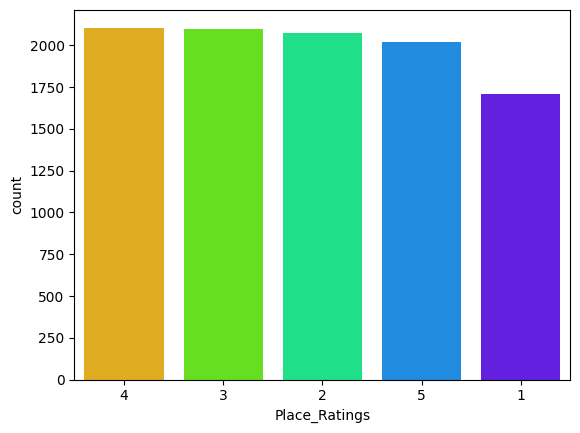

In [15]:
count = all_tourism['Place_Ratings'].value_counts()
percent = 100 * all_tourism['Place_Ratings'].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah sample' : count, 'Persentase' : percent.round(1)})
print(df)
sns.countplot(x = all_tourism['Place_Ratings'], data = all_tourism, palette = 'gist_rainbow', order = all_tourism['Place_Ratings'].value_counts().index)

                    Jumlah sample  Persentase
Taman Hiburan                3053        30.5
Budaya                       2683        26.8
Cagar Alam                   2415        24.2
Bahari                       1079        10.8
Pusat Perbelanjaan            385         3.8
Tempat Ibadah                 385         3.8


<Axes: xlabel='Category', ylabel='count'>

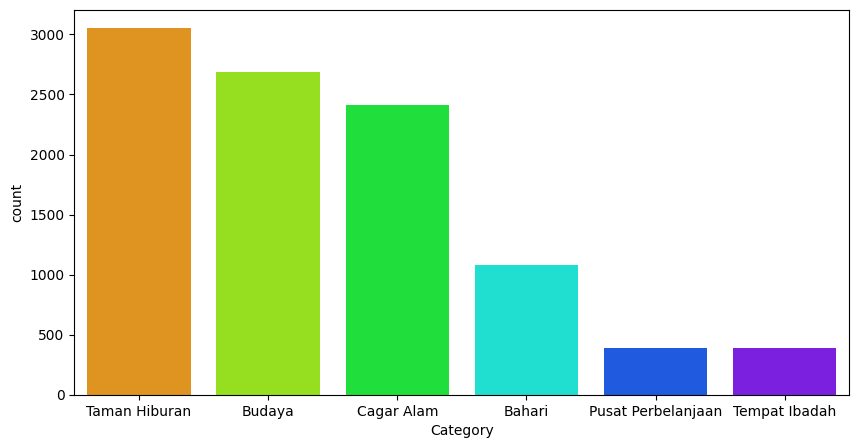

In [16]:
count = all_tourism['Category'].value_counts()
percent = 100 * all_tourism['Category'].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah sample' : count, 'Persentase' : percent.round(1)})
print(df)
plt.figure(figsize = (10,5))
sns.countplot(x = all_tourism['Category'], data = all_tourism, palette = 'gist_rainbow', order = all_tourism['Category'].value_counts().index)

In [17]:
print('Banyak tempat wisata : ', len(all_tourism['Place_Name'].unique()))
print('Nama Tempat : ', all_tourism['Place_Name'].unique())

Banyak tempat wisata :  437
Nama Tempat :  ['Candi Ratu Boko' 'Pantai Marina' 'Atlantis Water Adventure'
 'Museum Kereta Ambarawa' 'Kampung Wisata Sosro Menduran'
 'Taman Hutan Raya Ir. H. Juanda' 'Museum Gedung Sate'
 'Museum Taman Prasasti' 'Pantai Ngrawe (Mesra)' 'Taman Harmoni Keputih'
 'Tugu Pal Putih Jogja' 'Taman Sungai Mudal' 'De Mata Museum Jogja'
 'Surabaya North Quay' 'Museum Bahari Jakarta' 'Grand Maerakaca'
 'Margasatwa Muara Angke' 'Curug Anom' 'Museum Konferensi Asia Afrika'
 'Taman Cattleya' 'Monumen Bambu Runcing Surabaya' 'Pasar Seni'
 'Curug Tilu Leuwi Opat' 'Museum Mandala Wangsit Siliwangi'
 'Museum Wayang' 'Gua Pawon' 'Perkebunan Teh Malabar' 'Masjid Pusdai'
 'Taman Ismail Marzuki' 'Bentara Budaya Yogyakarta (BBY)' 'Kota Tua'
 'Bukit Jamur' 'Gereja Katedral' 'Taman Pintar Yogyakarta'
 'Wisata Eling Bening' 'Hutan Kota Srengseng' 'Puncak Pinus Becici'
 'Bangsal Pagelaran' 'Pantai Krakal' 'Museum TNI AL Loka Jala Crana'
 'Brown Canyon' 'Gereja Perawan Maria Tak Berd

# **DATA PREPARATION**

In [18]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Category         0
Place_Name       0
dtype: int64

In [19]:
len(all_tourism.Place_Id.unique())

437

In [20]:
all_tourism['Category'].unique()

array(['Budaya', 'Bahari', 'Taman Hiburan', 'Cagar Alam',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

In [21]:
preparation = all_tourism
preparation.sort_values('Place_Id')

,User_Id,Place_Id,Place_Ratings,Category,Place_Name
6236,187,1,4,Budaya,Monumen Nasional
5348,162,1,5,Budaya,Monumen Nasional
5610,169,1,5,Budaya,Monumen Nasional
2089,64,1,2,Budaya,Monumen Nasional
5231,159,1,1,Budaya,Monumen Nasional
...,...,...,...,...,...
8710,263,437,5,Tempat Ibadah,Gereja Perawan Maria Tak Berdosa Surabaya
6209,187,437,5,Tempat Ibadah,Gereja Perawan Maria Tak Berdosa Surabaya
7082,213,437,4,Tempat Ibadah,Gereja Perawan Maria Tak Berdosa Surabaya
6041,182,437,1,Tempat Ibadah,Gereja Perawan Maria Tak Berdosa Surabaya


In [22]:
preparation = preparation.drop_duplicates('Place_Id')
preparation

,User_Id,Place_Id,Place_Ratings,Category,Place_Name
0,1,179,3,Budaya,Candi Ratu Boko
1,1,344,2,Bahari,Pantai Marina
2,1,5,5,Taman Hiburan,Atlantis Water Adventure
3,1,373,3,Budaya,Museum Kereta Ambarawa
4,1,101,4,Budaya,Kampung Wisata Sosro Menduran
...,...,...,...,...,...
2008,62,370,1,Budaya,Benteng Pendem
2399,74,350,4,Bahari,Pantai Cipta
2448,75,10,2,Bahari,Pulau Tidung
2534,78,7,4,Cagar Alam,Kebun Binatang Ragunan


In [23]:
place_id = preparation['Place_Id'].tolist()
place_category = preparation['Category'].tolist()
place_name = preparation['Place_Name'].tolist()

print(len(place_id))
print(len(place_category))
print(len(place_name))

437
437
437


In [24]:
tourism_recommend = pd.DataFrame({
    'id' : place_id,
    'place_category' : place_category,
    'place_name' : place_name
})

tourism_recommend

,id,place_category,place_name
0,179,Budaya,Candi Ratu Boko
1,344,Bahari,Pantai Marina
2,5,Taman Hiburan,Atlantis Water Adventure
3,373,Budaya,Museum Kereta Ambarawa
4,101,Budaya,Kampung Wisata Sosro Menduran
...,...,...,...
432,370,Budaya,Benteng Pendem
433,350,Bahari,Pantai Cipta
434,10,Bahari,Pulau Tidung
435,7,Cagar Alam,Kebun Binatang Ragunan


# **MODELLING | CONTENT BASED FILTERING**

In [25]:
data = tourism_recommend
data.head()

,id,place_category,place_name
0,179,Budaya,Candi Ratu Boko
1,344,Bahari,Pantai Marina
2,5,Taman Hiburan,Atlantis Water Adventure
3,373,Budaya,Museum Kereta Ambarawa
4,101,Budaya,Kampung Wisata Sosro Menduran


In [26]:
tf = TfidfVectorizer()
tf.fit(data['place_name'])
tf.get_feature_names_out()

array(['3d', '45', '825', 'abang', 'abdullah', 'ade', 'adhyatma',
       'adventure', 'africa', 'afrika', 'agro', 'agrowisata', 'agung',
       'ahmad', 'air', 'aji', 'akbar', 'al', 'alam', 'alive', 'alun',
       'amazing', 'ambarawa', 'ancol', 'and', 'anggrek', 'angke',
       'angklung', 'anom', 'anteng', 'api', 'aquarium', 'ardilla', 'argo',
       'art', 'artha', 'aseupan', 'asia', 'asri', 'atlantis', 'ayodya',
       'babakan', 'badak', 'baduga', 'bahari', 'balai', 'bambu',
       'banaran', 'bandros', 'bandung', 'bangsal', 'bangunrejo', 'bank',
       'bantal', 'banteng', 'barat', 'barli', 'barn', 'baron', 'baru',
       'baruna', 'barunawati', 'basoeki', 'batik', 'batu', 'batununggal',
       'bay', 'bbws', 'bby', 'becici', 'begonia', 'belanda', 'bendung',
       'bening', 'bentara', 'benteng', 'berdosa', 'beringharjo', 'bibit',
       'bidadari', 'binatang', 'bintang', 'bintaran', 'biru', 'blaster',
       'blenduk', 'blue', 'boko', 'borobudur', 'bosscha', 'braga',
       'bra

In [27]:
tfdif_matrix = tf.fit_transform(data['place_name'])
tfdif_matrix.shape

(437, 712)

In [28]:
tfdif_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
pd.DataFrame(
    tfdif_matrix.todense(),
    columns = tf.get_feature_names_out(),
    index = data.place_name  
).sample(22, axis = 1).sample(10, axis = 0)

,balai,bungkul,barunawati,sedahan,batu,gethuk,seoul,rakyat,empring,kapal,...,intan,temple,sampoerna,sunaryo,kereta,dago,malabar,canyon,puncak,lansia
place_name,,,,,,,,,,,,,,,,,,,,,
Kampung Tematik Jawi,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Taman Sungai Mudal,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pantai Sanglen,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Museum Sasmita Loka Ahmad Yani,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Monumen Jalesveva Jayamahe,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Monumen Kapal Selam,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.60954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nol Kilometer Jl.Malioboro,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Taman Balai Kota Bandung,0.651615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sanghyang Heuleut,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**COSINE SIMILARITY**

In [30]:
cosine_sim = cosine_similarity(tfdif_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
cosine_sim_df = pd.DataFrame(cosine_sim, index = data['place_name'], columns = data['place_name'])
print('Shape : ', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis = 1).sample(10, axis = 0)

Shape :  (437, 437)


place_name,Pantai Siung,Jurang Tembelan Kanigoro,Hutan Kota Srengseng,Gumuk Pasir Parangkusumo,La Kana Chapel
place_name,,,,,
NuArt Sculpture Park,0.000000,0.0,0.0,0.0,0.0
Museum Nasional,0.000000,0.0,0.0,0.0,0.0
Green Village Gedangsari,0.000000,0.0,0.0,0.0,0.0
Taman Miniatur Kereta Api,0.000000,0.0,0.0,0.0,0.0
Pulau Semak Daun,0.000000,0.0,0.0,0.0,0.0
Heha Sky View,0.000000,0.0,0.0,0.0,0.0
Pantai Depok Jogja,0.181401,0.0,0.0,0.0,0.0
Sanghyang Heuleut,0.000000,0.0,0.0,0.0,0.0
Benteng Pendem,0.000000,0.0,0.0,0.0,0.0


In [32]:

def tourism_recommendations(nama_tempat, similarity_data = cosine_sim_df, items = data[['place_name', 'place_category']], k = 5) :
  index = similarity_data.loc[:, nama_tempat].to_numpy().argpartition(
      range(-1, -k, -1)
  )

  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  closest = closest.drop(nama_tempat, errors = 'ignore')

  return pd.DataFrame(closest).merge(items).head(k)

In [33]:
data[data.place_name.eq('Pantai Baron')]

,id,place_category,place_name
384,157,Bahari,Pantai Baron


In [34]:
tourism_recommendations('Pantai Baron')

,place_name,place_category
0,Pantai Ancol,Bahari
1,Pantai Marina,Bahari
2,Pantai Congot,Bahari
3,Pantai Drini,Bahari
4,Pantai Ngrenehan,Bahari


# **MODELLING | COLLABORATIVE FILTERING**